<a href="https://colab.research.google.com/github/Ozioma1/Data-Mining-Project-/blob/main/Project_for_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Assignment 4***



**Name:Ozioma Aguegboh**

**Course:Data Mining and Machine Learning**

 **DATASET ORIGIN** :This dataset, sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, aims to predict the diagnostic presence of diabetes in patients based on specific measurements. The dataset is constrained to include instances of females aged at least 21 with Pima Indian heritage, selected from a larger database.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.io import arff # Libraires to enable me upload the arff file.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
data = arff.loadarff("/content/drive/MyDrive/diabetes.arff") # To upload the arff file into the google colab
df = pd.DataFrame(data[0])
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


**DATASET DESCRIPTION**:
The dataset is represented as a pandas DataFrame with 768 entries and 9 columns. Each row corresponds to an individual, and the columns include:

 **'preg' (number of pregnancies)**

 **'plas' (plasma glucose concentration)**

 **'pres' (blood pressure)**

**'skin' (skin thickness)**

 **'insu' (insulin level)**

**'mass' (body mass index)**

**'pedi' (diabetes pedigree function)**

**'age' (age)**

**'class' (diabetes status as an object variable)**

The data types vary, with 8 columns being float64 and 1 column as object. The dataset has no missing values, and the memory usage is 54.1+ KB.Specific criteria guided the selection of instances from a larger database. Notably, all individuals in this dataset are females aged at least 21 and belong to the Pima Indian heritage.


**classification methods**:For this project I will be working on the following :

DecisionTreeClassifier (Decision Tree)

LogisticRegression (Functions)

MLPClassifier (Neural Network)

In [ ]:
## Data cleaning
missing_values = df.isnull().sum()
missing_values

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [ ]:
#To see if there are NAN in the dataset
NAN_values=df.isnull().values.any()
NAN_values

False

From the above, we could see that there are no NAN values and there is no missing_values, however we could see zero(0) values assigned to an individual for Mass(Body mass index) which cannot be zero.The zero was assigned in other to aviod leaving it empty.

In [ ]:
# I will modify some of the data with the value zero(0) to go ahead with my analysis
#but I won't do that for preg.
df = pd.DataFrame(data[0])
preg_col = df['preg'] # Store the 'preg' column separately
df.drop('preg', axis=1, inplace=True) # To remove preg column
df.replace(0,df.mean(axis=0),inplace=True) # To replace missing values with the mean
df['preg'] = preg_col#To replace preg column
df.head()

<ipython-input-47-f649d8bbe778>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.replace(0,df.mean(axis=0),inplace=True) # To replace missing values with the mean


,plas,pres,skin,insu,mass,pedi,age,class,preg
0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,b'tested_positive',6.0
1,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,b'tested_negative',1.0
2,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,b'tested_positive',8.0
3,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,b'tested_negative',1.0
4,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,b'tested_positive',0.0


In [ ]:
le_class = LabelEncoder()
df['class_le'] = le_class.fit_transform(df['class'])
df.head()

,plas,pres,skin,insu,mass,pedi,age,class,preg,class_le
0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,b'tested_positive',6.0,1
1,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,b'tested_negative',1.0,0
2,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,b'tested_positive',8.0,1
3,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,b'tested_negative',1.0,0
4,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,b'tested_positive',0.0,1


**Data Preprocessing** : Prior to applying the classification algorithm, the dataset undergoes scaling through the MinMaxScaler() function from the sklearn library. This function scales features by transforming each feature to a specified range.

In [ ]:
label_encoder= LabelEncoder()
Features_scale = ['preg','plas','pres','skin','insu','mass','pedi','age']
scaler =MinMaxScaler()
df[Features_scale] =scaler.fit_transform(df[Features_scale])
df['class']= label_encoder.fit_transform(df['class'])
df.head()

,plas,pres,skin,insu,mass,pedi,age,class,preg,class_le
0,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333,1,0.352941,1
1,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667,0,0.058824,0
2,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333,1,0.470588,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0,0.058824,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1,0.000000,1


In [ ]:
df.drop('class',axis='columns')

,plas,pres,skin,insu,mass,pedi,age,preg,class_le
0,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333,0.352941,1
1,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667,0.058824,0
2,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333,0.470588,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.058824,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0.000000,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.588235,0
764,0.503226,0.469388,0.217391,0.079086,0.380368,0.111870,0.100000,0.117647,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.294118,0
766,0.529032,0.367347,0.147135,0.079086,0.243354,0.115713,0.433333,0.058824,1


In [ ]:
from sklearn import preprocessing
min_max_scaler =preprocessing.MinMaxScaler(feature_range=(0,1))
X=df.drop(['class_le','class'], axis=1)
y=df['class_le']

**TRAINING THE DATASET**

In [ ]:
## Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape)# Splitting of dataset
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


**DecisionTreeClassifier (Decision Tree)**

In [ ]:
## Applying DecisionTreeClassifier
plus=tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=0)

In [ ]:
# Train the models
plus = tree_classifier.fit(X_train, y_train)

In [ ]:
#To predicit the response for the test
y_pred =plus.predict(X_test)

**JUSTIFICATION**:


1.   Decision trees provide a comprehensible and interpretable structure, making them useful in healthcare applications where understanding the forecast elements relies on the model's decisions' interpretability.
2.   Decision trees are ideal for medical datasets due to their ability to capture complex, non-linear relationships between health-related features, making them suitable for such scenarios.





**LogisticRegression (Functions)**

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state=0)

In [ ]:
#Training model
log=logistic_reg.fit(X_train, y_train)

In [ ]:
#To predicit the response for the test
y_pred_lg=log.predict(X_test)

**JUSTIFICATIONS**

**Logistic Regression**

•	Effective for binary classification

•	Assumes linear relationship between variables.


***MLPClassifier (Neural Network)***

In [ ]:
#Mlpclassifier
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=0)

In [ ]:
#Training model
mlpc=MLP.fit(X_train, y_train)

In [ ]:
#To predicit the response for the test
y_pred_MLPR = mlpc.predict(X_test)

***JUSTIFICATIONS***

MLP Classifier (Neural Network)

•	Handles complex relationships.

•	Requires more computational resources.


**PERFORMANCE EVALUATION**

In [ ]:
# Performance evaluation
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f'{model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

evaluate_model(y_pred, 'Decision Tree')
evaluate_model(y_pred_lg, 'Logistic Regression')
evaluate_model(y_pred_MLPR, 'Neural Network')

Decision Tree - Accuracy: 0.7922077922077922, Precision: 0.6415094339622641, Recall: 0.723404255319149, F1 Score: 0.68
Logistic Regression - Accuracy: 0.8116883116883117, Precision: 0.75, Recall: 0.574468085106383, F1 Score: 0.6506024096385542
Neural Network - Accuracy: 0.7987012987012987, Precision: 0.7105263157894737, Recall: 0.574468085106383, F1 Score: 0.6352941176470589


Decision Tree - Accuracy: 0.7922077922077922, Precision: 0.6415094339622641, Recall: 0.723404255319149, F1 Score: 0.68, AUC: 0.7729170809306024


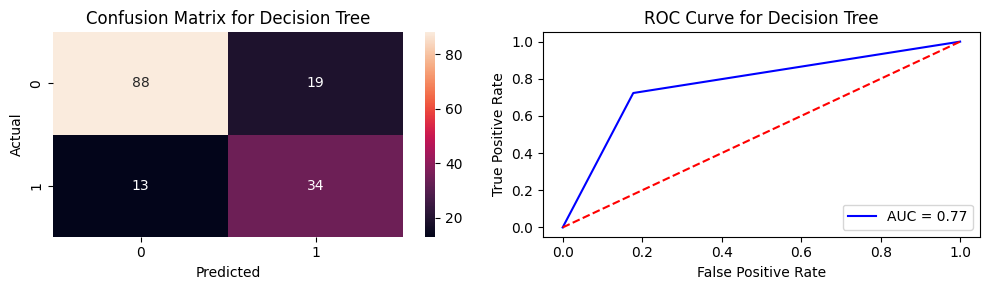

Logistic Regression - Accuracy: 0.8116883116883117, Precision: 0.75, Recall: 0.574468085106383, F1 Score: 0.6506024096385542, AUC: 0.7451779677868364


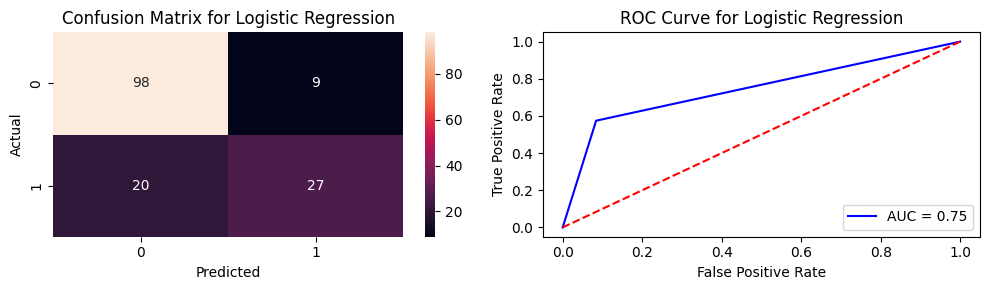

Neural Network - Accuracy: 0.7987012987012987, Precision: 0.7105263157894737, Recall: 0.574468085106383, F1 Score: 0.6352941176470589, AUC: 0.7358321733943131


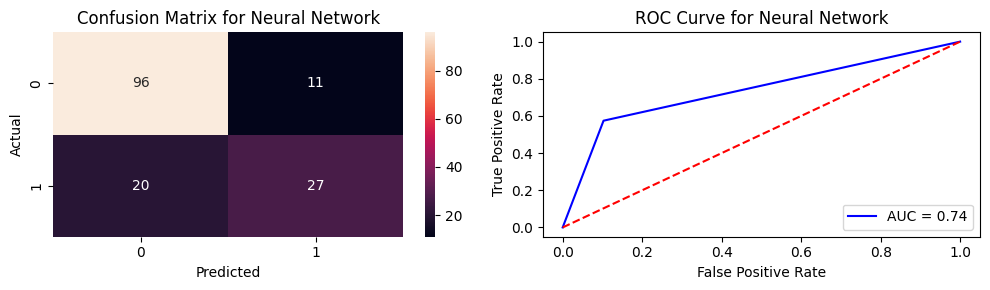

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Performance evaluation function
def evaluate_model(predictions, model_name, y_true, y_scores):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    conf_matrix = confusion_matrix(y_true, predictions)
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    print(f'{model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {auc}')

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Plotting the ROC curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

# Example of how to call the function
evaluate_model(y_pred, 'Decision Tree', y_test, y_pred)
evaluate_model(y_pred_lg, 'Logistic Regression', y_test, y_pred_lg)
evaluate_model(y_pred_MLPR, 'Neural Network', y_test, y_pred_MLPR)

In [ ]:
data = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Neural Network'],
    'Accuracy': [0.7922077922077922, 0.8116883116883117, 0.7987012987012987],
    'Precision': [0.6415094339622641, 0.75, 0.7105263157894737],
    'Recall': [0.723404255319149, 0.574468085106383, 0.574468085106383],
    'F1 Score': [0.68, 0.6506024096385542, 0.6352941176470589],
    'ROC': [0.77, 0.75, 0.74]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC
0        Decision Tree  0.792208   0.641509  0.723404  0.680000  0.77
1  Logistic Regression  0.811688   0.750000  0.574468  0.650602  0.75
2       Neural Network  0.798701   0.710526  0.574468  0.635294  0.74


In [ ]:
# Define the data
data = {
    'Classification Method': ['Decision Tree', 'Logistic Regression', 'Neural Network'],
    'True Positive [1,1]': [27, 34, 27],
    'True Negative [0,0]': [88, 98, 96],
    'False Positive [0,1]': [20, 19, 11],
    'False Negative [1,0]': [27, 13, 20]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


  Classification Method  True Positive [1,1]  True Negative [0,0]  \
0         Decision Tree                   27                   88   
1   Logistic Regression                   34                   98   
2        Neural Network                   27                   96   

   False Positive [0,1]  False Negative [1,0]  
0                    20                    27  
1                    19                    13  
2                    11                    20  


**Result Interpretation**

**Best Overall Model**: The Logistic Regression model stands out as the best choice in this context due to its highest Accuracy and Precision. It is particularly suitable in scenarios where the cost of false positives (incorrectly labeling a negative instance as positive) is high.

**Balance Between Precision and Recall**: The Decision Tree model provides a better balance between Precision and Recall as reflected in its F1 Score and has the highest ROC AUC, making it a strong candidate when both types of classification errors are equally costly.

**Precision Over Recall**: The Neural Network model, while competitive in terms of Accuracy, leans towards Precision at the cost of Recall, making it suitable for scenarios where it's crucial to be more confident about the positive predictions even if some positive cases are missed.


**CONCLUSION**

The choice of the best model depends on the specific requirements of your task. If overall accuracy and reducing false positives are most important, Logistic Regression is preferable. If you need a balance between false positives and false negatives, the Decision Tree is a better choice. The Neural Network, with its emphasis on precision, is ideal when false positives carry a higher cost.